In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [66]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [68]:
df.shape

(907, 27)

In [69]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [71]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [72]:
df.isna().all()

country                     False
country_long                False
name                        False
gppd_idnr                   False
capacity_mw                 False
latitude                    False
longitude                   False
primary_fuel                False
other_fuel1                 False
other_fuel2                 False
other_fuel3                  True
commissioning_year          False
owner                       False
source                      False
url                         False
geolocation_source          False
wepp_id                      True
year_of_capacity_data       False
generation_gwh_2013          True
generation_gwh_2014         False
generation_gwh_2015         False
generation_gwh_2016         False
generation_gwh_2017         False
generation_gwh_2018         False
generation_gwh_2019          True
generation_data_source      False
estimated_generation_gwh     True
dtype: bool

In [73]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

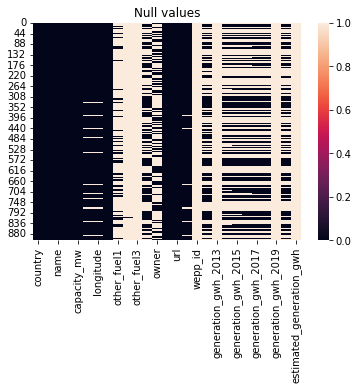

In [74]:
#heatmap for null values 
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [75]:
df.drop(['other_fuel2'],axis=1,inplace=True)

In [76]:
df.drop(['other_fuel3'],axis=1,inplace=True)

In [77]:
df.drop(['wepp_id'],axis=1,inplace=True)

In [78]:
df.drop(['generation_gwh_2013'],axis=1,inplace=True)

In [79]:
df.drop(['generation_gwh_2019'],axis=1,inplace=True)

In [80]:
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)

In [81]:
df.drop(['other_fuel1'],axis=1,inplace=True)

In [ ]:
df.drop(['other_fuel1'],axis=1,inplace=True) 

In [88]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

In [92]:
#fixing null values 
df['latitude'].fillna(df['latitude'].mode()[0],inplace=True)
df['longitude'].fillna(df['longitude'].mode()[0],inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0],inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mode()[0],inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mode()[0],inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mode()[0],inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mode()[0],inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mode()[0],inplace=True)

In [93]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

we have been able to deal with all the null values

In [94]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,229,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,1,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,258,Ultratech Cement ltd,http://www.ultratechcement.com/,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2015.0,2,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,280,Central Electricity Authority,http://www.cea.nic.in/,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,280,Central Electricity Authority,http://www.cea.nic.in/,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,280,Central Electricity Authority,http://www.cea.nic.in/,2,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,0
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2015.0,114,Karnataka Power Corporation Limited,http://karnatakapower.com,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2015.0,280,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2015.0,91,Hindustan Zinc ltd,http://www.hzlindia.com/,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [95]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                       int32
source                     object
url                        object
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

In [96]:
#encoding the columns with strings
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['country_long']=le.fit_transform(df['country_long'])
df['name']=le.fit_transform(df['name'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])

In [97]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,2011.0,229,109,128,1,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0,0,1,519,98.0,24.7663,74.6090,1,2015.0,258,174,173,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0,0,2,853,39.2,21.9038,69.3732,7,2015.0,2,21,205,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.0,280,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.0,280,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2016.0,280,22,58,2,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,0
903,0,0,903,822,3.0,12.8932,78.1654,6,2015.0,114,77,22,0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
904,0,0,904,891,25.5,15.2758,75.5811,7,2015.0,280,21,260,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
905,0,0,905,539,80.0,24.3500,73.7477,1,2015.0,91,59,82,2,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1


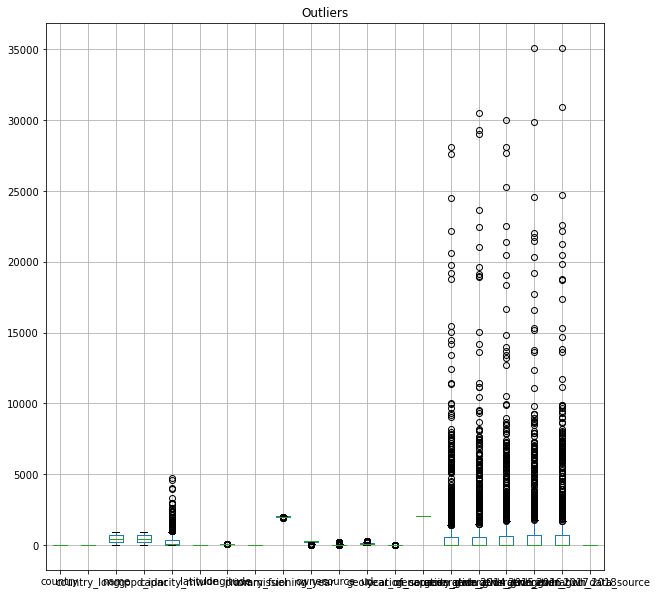

In [98]:
#creating distribution plots for the columns to see which is useful and which isn't
#checking for outliers 
df.iloc[:,0:30].boxplot(figsize=[10,20])
plt.subplots_adjust(bottom=0.5)
plt.title("Outliers")
plt.show()

In [85]:
#checking for skewness 
df.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_10228/2596485058.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


capacity_mw               3.123576
latitude                 -0.145866
longitude                 1.112646
commissioning_year       -1.067949
owner                    -1.373940
geolocation_source       -1.920302
year_of_capacity_data     0.000000
generation_gwh_2014       3.342707
generation_gwh_2015       3.665904
generation_gwh_2016       3.512370
generation_gwh_2017       3.566070
generation_gwh_2018       3.476298
generation_data_source   -0.019880
dtype: float64

In [86]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
owner                     281
source                    191
url                       304
geolocation_source          4
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      2
dtype: int64

In [99]:
#dividing the data into features and label
x= df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

In [100]:
#scaling the data 


In [ ]:
#using vif on the data 


In [107]:
#using different algorihms to train and predict the model and accuracy respectively 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 

In [108]:
#trainig the data 
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is = {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is = {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is = 0.7384065723580916
At random state 0,the testing accuracy is = 0.8095547832344523


At random state 1,the training accuracy is = 0.7625704450023001
At random state 1,the testing accuracy is = 0.7103683077657927


At random state 2,the training accuracy is = 0.7657268949000264
At random state 2,the testing accuracy is = 0.6951232648533925


At random state 3,the training accuracy is = 0.7547784175791509
At random state 3,the testing accuracy is = 0.7457379228611436


At random state 4,the training accuracy is = 0.7494971575053395
At random state 4,the testing accuracy is = 0.7701615324477269


At random state 5,the training accuracy is = 0.7591974448948724
At random state 5,the testing accuracy is = 0.734978202390912


At random state 6,the training accuracy is = 0.7636636917000815
At random state 6,the testing accuracy is = 0.7090508642965272


At random state 7,the training accuracy is = 0.7514673165505085
At random state 7,the testing accu

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

In [110]:
pred_test=lr.predict(x_test)

In [111]:
pred_train=lr.predict(x_train)

In [112]:
print(r2_score(y_test,pred_test)*100)

78.50955589997032


In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [114]:
pred_test=lr.predict(x_test)
pred_test

array([ 2.58150181,  2.91920673,  6.36290337,  2.03596207,  3.00568317,
        1.81759609,  6.31276949,  7.79542084,  2.34432239,  6.7907572 ,
        2.27674547,  6.61595371,  2.85483571,  4.88316768,  2.24850083,
        1.70639192,  0.29604821,  2.72988438,  1.81090073,  8.38285608,
        0.29107808,  7.19977588,  1.7046064 ,  3.339683  ,  7.11090179,
        2.54015901,  6.6380534 ,  2.70902457,  1.70634794,  5.92863395,
        1.1117787 ,  3.27807494,  6.96047579,  7.87827432,  2.73768102,
        2.17985439,  1.88084561,  2.19324146,  6.26693882,  1.14827719,
        1.65529128,  1.77134709,  3.3270424 ,  6.72324548,  6.66719606,
        0.14073431,  1.0280182 ,  2.25929683,  4.0292106 ,  1.15384521,
        1.38410479,  2.87065083,  1.36402446,  1.76218769,  6.90720506,
        6.00144506,  2.32098524,  1.98801455,  1.60514721,  3.56026323,
        2.5034128 ,  1.47630569,  1.89296449,  1.8632321 ,  1.22966912,
        0.81074841,  2.30301708,  1.18906791,  1.94454415,  1.77

In [115]:
pred_train=lr.predict(x_train)
pred_train

array([ 2.23243017,  2.23811334,  1.41214479,  1.69119664,  1.93163573,
        6.42638246,  0.91774014,  2.49492753,  1.41845432,  2.96022046,
        7.49434216,  5.23124098,  1.32192022,  5.84509625,  5.97977923,
        5.96957287,  2.27968428,  2.18054955,  2.06973547,  2.37603161,
        2.24314728,  1.23403244,  0.81199797,  1.71226878,  6.11419255,
        3.31681   ,  3.05280264,  6.61128016,  7.01541353,  2.80722136,
        0.71838282,  2.93407029,  1.07188259,  2.67459804,  1.5758828 ,
        2.80210527,  1.90815164,  2.64649741,  4.79398759,  2.74100505,
        7.41437662,  2.15803453,  5.84862256,  7.95725374,  2.05716823,
        6.67210468,  1.60049872,  1.85353532,  4.60025903,  5.27994336,
        1.96256595,  7.06717603,  1.64449837,  1.6562366 ,  0.54932176,
        2.03683148,  1.97924938,  6.6857693 ,  2.80908523,  5.65884507,
        2.49124507,  1.98624195,  3.41102786,  2.35050592,  0.41712197,
        0.49839682,  2.89458078,  6.6465437 ,  0.7710118 ,  1.14

In [116]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

75

In [117]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([1.        , 2.66666667, 7.        , 1.5       , 4.        ,
       3.        , 6.        , 7.        , 0.33333333, 7.        ,
       3.5       , 6.        , 3.        , 6.        , 3.        ,
       1.        , 1.        , 1.        , 3.33333333, 7.        ,
       1.        , 7.        , 1.        , 1.        , 7.        ,
       3.        , 7.        , 2.        , 0.        , 7.        ,
       1.        , 1.        , 7.        , 7.        , 3.        ,
       2.        , 1.        , 0.        , 7.        , 3.5       ,
       3.        , 1.        , 1.        , 6.        , 7.        ,
       1.        , 3.5       , 1.5       , 7.        , 3.5       ,
       0.        , 3.        , 1.        , 0.        , 7.        ,
       6.        , 1.        , 2.        , 1.        , 3.        ,
       3.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 3.        , 1.        , 1.        , 1.5       ,
       3.        , 7.        , 6.        , 1.        , 2.66666

In [118]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

99

In [119]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=2,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [120]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

96

In [121]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [122]:
y_pred=model.predict(x_test)
y_pred

array([ 1.6763155e+00,  2.5674155e+00,  6.9541011e+00,  1.8072432e+00,
        3.4039619e+00,  2.6166420e+00,  5.9643626e+00,  6.9541011e+00,
        2.2001591e-01,  6.9541011e+00,  1.7812114e+00,  5.9669232e+00,
        2.8696866e+00,  6.0395060e+00,  2.9505315e+00,  1.0135839e+00,
        1.0863094e+00,  1.0108310e+00,  2.6319501e+00,  7.0396166e+00,
        7.5680184e-01,  6.9541011e+00,  9.9399418e-01,  9.5954931e-01,
        6.9541011e+00,  3.0836406e+00,  6.9541011e+00,  1.7852023e+00,
        1.0396615e+00,  6.9541011e+00,  1.0216596e+00,  1.0090975e+00,
        6.9541011e+00,  6.9541011e+00,  2.8594117e+00,  2.2215078e+00,
        9.3382674e-01,  4.8626241e-01,  6.9541011e+00,  1.3045787e+00,
        2.3768983e+00,  1.0290035e+00,  1.8346019e+00,  5.9545517e+00,
        6.9541011e+00,  1.0608058e+00,  1.0673871e+00,  1.4986143e+00,
        6.9541011e+00,  1.0885296e+00,  2.8181419e-01,  2.8145103e+00,
        1.9546674e+00,  7.0031241e-02,  6.9541011e+00,  5.9669232e+00,
      

In [123]:
model.score(x_train,y_train)*100

98.96365205973028

In [124]:
model_accuracy=round(model.score(x_train,y_train)*100)
model_accuracy

99

In [125]:
#Cross validation  for desisiontree
scr=cross_val_score(tree,x,y,cv=5)
scr.mean()
print("Cross validation score of DecisionTreeRegression:",scr.mean())

Cross validation score of DecisionTreeRegression: 0.8760687960678141


In [126]:
#Cross validation  for xgboost
scr=cross_val_score(model,x,y,cv=5)
scr.mean()
print("Cross validation score of Xgboost:",scr.mean())

Cross validation score of Xgboost: 0.9146039113195259


For the prediction of primary_fuel, I will choose the decision tree regressor, as it gives the best  model for prediction. 

In [127]:
#saving the model
import pickle 
filename='churn.pkl'
pickle.dump(tree,open(filename,'wb'))

In [128]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)*100
result

89.63574229533926

In [129]:
#creatig a new df
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_train[:]],index=["Predicted","Original"])

In [130]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,715,716,717,718,719,720,721,722,723,724
Predicted,1.00000,2.666667,7.000000,1.500000,4.000000,3.000000,6.00000,7.000000,0.333333,7.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,2.23243,2.238113,1.412145,1.691197,1.931636,6.426382,0.91774,2.494928,1.418454,2.96022,...,5.992757,3.052705,3.063122,1.609496,2.083335,6.88848,1.896717,2.160217,1.524691,2.658274


In [131]:
#training  a model for capacity_mw
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [132]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is = {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is = {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is = 0.8383253193158229
At random state 0,the testing accuracy is = 0.9112572013854335


At random state 1,the training accuracy is = 0.8597471162020967
At random state 1,the testing accuracy is = 0.8570837418138787


At random state 2,the training accuracy is = 0.8653021971756504
At random state 2,the testing accuracy is = 0.8337972058846764


At random state 3,the training accuracy is = 0.8621791453992513
At random state 3,the testing accuracy is = 0.845916519287714


At random state 4,the training accuracy is = 0.8500575730483583
At random state 4,the testing accuracy is = 0.8956952171222891


At random state 5,the training accuracy is = 0.8613637134238981
At random state 5,the testing accuracy is = 0.8519384101595491


At random state 6,the training accuracy is = 0.8672548052769252
At random state 6,the testing accuracy is = 0.8193140970461339


At random state 7,the training accuracy is = 0.8715490103913476
At random state 7,the testing accu

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

In [134]:
pred_test=lr.predict(x_test)

In [135]:
pred_train=lr.predict(x_train)

In [136]:
print(r2_score(y_test,pred_test)*100)

88.0654503841446


In [137]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [138]:
pred_test=lr.predict(x_test)
pred_test

array([ 3.42724765e+02,  1.73249697e+02,  1.98201386e+01,  3.05853138e+02,
       -9.37217672e+01,  2.89731703e+02,  6.61504818e+01,  8.51376824e+01,
        1.29739115e+02,  5.86571521e+01,  2.91862894e+02,  5.92412243e+01,
        2.57275608e+02,  1.46568057e+01,  4.54287515e+02,  7.00859838e+01,
        1.42201929e+03,  7.59595268e+02,  2.43274675e+02,  1.29330661e+02,
        2.56200409e+01,  7.42928757e+01,  1.51650133e+03,  5.63418483e+02,
        7.83411857e+01,  2.61787775e+02,  5.71912671e+01,  4.65800285e+02,
        7.09499595e+01,  3.05194049e+00,  3.76030246e+03,  2.08536506e+03,
        7.79521961e+01,  9.27088923e+01,  3.43392936e+02,  3.50340499e+02,
        5.18247242e+01,  8.39394234e+01,  2.67485856e+01,  4.89645916e+01,
        3.47736129e+02,  1.46650760e+03,  6.94529571e+02,  7.57258851e+01,
        4.65991160e+01,  6.00710961e+02,  6.42901114e+01,  4.68800409e+02,
       -3.27457255e+01,  6.45028432e+01,  7.38504863e+01,  3.53166101e+02,
        3.32594469e+02,  

In [139]:
pred_train=lr.predict(x_train)
pred_train

array([ 4.08387162e+02,  2.00118229e+02,  2.61551025e+02,  5.30593230e+02,
        6.01201672e+02,  4.50345620e+01,  2.99016727e+03,  1.92251821e+02,
        1.71251513e+02,  2.81418164e+01,  9.73077210e+01, -4.51478164e+01,
        7.98478286e+02,  9.29358483e+00,  3.88833144e+01,  3.41797531e+01,
        3.25761278e+02,  2.37514103e+02,  8.79501278e+01,  1.96812131e+02,
        3.83860292e+02,  1.50526402e+03,  1.19200031e+03,  2.19602228e+03,
        5.00107425e+01,  1.82508125e+02,  3.66655850e+01,  6.78624037e+01,
        5.46267793e+01,  8.05836422e+02,  1.03168441e+02,  1.50644382e+02,
        7.16712657e+02,  2.76441942e+02,  1.21423234e+02,  3.55371166e+02,
       -4.55718861e+01, -4.48111732e+01,  2.14632982e+01,  8.36577160e+01,
        7.96211513e+01,  6.37578746e+02,  1.11575804e+01,  1.16275672e+02,
        7.85287957e+02,  6.48007858e+01,  8.45406095e+01,  7.15105866e+02,
        6.01209268e+00, -2.43661613e+01,  6.21766890e+02,  7.83091816e+01,
        1.11195647e+02,  

In [140]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

86

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([5.76500000e+01, 3.85000000e+02, 1.40976744e+01, 2.10000000e+02,
       1.27500000e+01, 3.85000000e+02, 6.95416667e+00, 6.77150000e+01,
       3.20000000e+01, 1.40976744e+01, 4.45000000e+02, 4.19444444e+00,
       3.97500000e+02, 6.95416667e+00, 5.82500000e+02, 3.12333333e+01,
       1.95000000e+03, 1.28500000e+03, 1.10000000e+02, 1.40976744e+01,
       3.99484211e+01, 1.40976744e+01, 1.20000000e+03, 3.41666667e+02,
       6.77150000e+01, 5.00000000e+01, 1.05000000e+02, 2.64266667e+02,
       1.55500000e+02, 3.12875000e+01, 3.00000000e+03, 1.59000000e+03,
       1.76666667e+00, 1.38333333e+01, 1.47000000e+02, 9.50000000e+01,
       3.99484211e+01, 3.30000000e+01, 1.40976744e+01, 3.99484211e+01,
       2.85000000e+02, 1.29000000e+03, 3.30000000e+02, 4.19444444e+00,
       1.40976744e+01, 1.13333333e+03, 3.70000000e+01, 2.85000000e+02,
       1.40976744e+01, 2.16666667e+01, 3.99484211e+01, 1.90000000e+02,
       6.19093333e+02, 1.55500000e+02, 1.38333333e+01, 6.95416667e+00,
      

In [142]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

97

In [143]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=2,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [144]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

94

In [145]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [146]:
y_pred=model.predict(x_test)
y_pred

array([ 107.96184 ,  130.0805  ,   29.735981,  145.96043 ,   26.48798 ,
        206.45322 ,   19.056002,   34.616016,   30.107   ,   30.130135,
        470.77475 ,   29.949606,  386.68204 ,   20.154167,  465.5527  ,
         54.330536, 1941.7017  , 1104.1145  ,  109.99979 ,   29.735981,
         49.5617  ,   25.360409, 1303.2622  ,  417.14597 ,   33.326496,
        483.54218 ,   61.207138,  328.40692 ,   66.95186 ,   29.735981,
       3053.3442  , 1603.8496  ,   25.183157,   34.616016,  198.9439  ,
        212.63876 ,   64.372154,   67.296074,   30.130135,   59.60331 ,
        342.45248 , 1487.3988  ,  587.0587  ,   89.34047 ,   28.19826 ,
       1184.9922  ,  118.754295,  323.18057 ,   26.115032,   49.12952 ,
         54.330536,  341.1799  ,  486.06665 ,   55.20602 ,   31.273525,
         26.478422, 1259.3627  ,  286.6057  ,  231.66396 ,   22.707712,
        149.8745  , 1589.0626  ,  328.99933 ,  786.3063  ,  523.37134 ,
       1864.7303  ,  598.6008  , 1026.0898  ,  993.51935 , 1271.

In [147]:
model.score(x_train,y_train)*100

98.83848717230677

In [148]:
#Cross validation  for desisiontree
scr=cross_val_score(tree,x,y,cv=5)
scr.mean()
print("Cross validation score of DecisionTreeRegression:",scr.mean())

Cross validation score of DecisionTreeRegression: 0.7741525067326303


In [149]:
#Cross validation  for xgboost
scr=cross_val_score(model,x,y,cv=5)
scr.mean()
print("Cross validation score of Xgboost:",scr.mean())

Cross validation score of Xgboost: 0.7924373921030209


In [150]:
#regularising the data 
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=XGBRegressor()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [151]:
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [152]:
#final model training
ls=Lasso(alpha = 10, random_state= 0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

85.16164124997306

In [153]:
lss=r2_score(y_test,pred_ls)
lss*100

85.85270970888685

In [154]:
ls_accuracy=round(ls.score(x_train,y_train)*100)
ls_accuracy

85

As we've seen above, I have chosen the decsion tree regressor as it gives the best prediction for capacity_mw. 

In [155]:
#saving the model
import pickle 
filename='churn.pkl'
pickle.dump(tree,open(filename,'wb'))

In [156]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)*100
result

84.98164116171506

In [157]:
#creatig a new df
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_train[:]],index=["Predicted","Original"])

In [158]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,715,716,717,718,719,720,721,722,723,724
Predicted,57.650000,385.000000,14.097674,210.00000,12.750000,385.000000,6.954167,67.715000,32.000000,14.097674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,408.387162,200.118229,261.551025,530.59323,601.201672,45.034562,2990.167274,192.251821,171.251513,28.141816,...,38.238683,334.689004,159.983059,595.276932,120.368907,61.267522,86.849319,-68.084796,292.204147,134.470513
